In [1]:
# File : SongandDanceMan.ipynb
# Author : Jatan Pandya (https://github.com/jatanjay/)
# University of Massachusetts - Amherst

# **Song and Dance Man**
## A corpus based analysis on the works of Bob Dylan from the year 1960 to 2020

In [2]:
# you could add an image or something here

> ### **Start low, go slow. Catch fire, rise higher.**

#### Let's start by scratching the surface of Bob Dylan's corpus, by first cleaning, applying various Natrual Language Processing (NLP) text processing methods and then by extracting information about the same in a way that will help us understand the corpus in a much better way.Along the way, we'll acquaint ourselves with basics of NLP and concepts of English language etc. and ideas that come up in corpus based analysis.

### We will be using various meta files and the Corpus CSV file that we generated using 
### [CorpusGenius](https://github.com/jatanjay/CorpusGenius) for Bob Dylan
#### Files such as : 
##### 1.Dylan's corpus 
##### 2.Lyrics of songs released by year
##### 3.Dylan's Discography by year
##### 4.List of all songs relased by Dylan
#### Let's start by importing necessary modules for this project and the files that'll be needed 

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import nltk
from nltk import ngrams
from pprint import pprint

import pandas as pd
import string 

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords   
import re

In [252]:
plt.style.use("seaborn")

In [253]:
dylan_albums = r"C:/Users/jayes/PycharmProjects/SongandDanceMan/Final_final_final_dylan/Dylan_albums.csv"
dylan_tracks = r"C:/Users/jayes/PycharmProjects/SongandDanceMan/Final_final_final_dylan/Dylan_tracks.csv"
dylan_lyrics = r"C:/Users/jayes/PycharmProjects/SongandDanceMan/Final_final_final_dylan/Dylan_lyrics.csv"
dylan_by_years = r"C:/Users/jayes/PycharmProjects/SongandDanceMan/Final_final_final_dylan/Dylan_lyrics_by_years.csv"
dylan_corpus = r"C:/Users/jayes/PycharmProjects/SongandDanceMan/Final_final_final_dylan/Dylan_corpus.csv"

In [254]:
# first albums released by years

In [255]:
albums = pd.read_csv(dylan_albums)
tracks = pd.read_csv(dylan_tracks)
lyrics = pd.read_csv(dylan_lyrics)
by_years_raw = pd.read_csv(dylan_by_years,squeeze=True)

### Below are all the albums released by Bob Dylan

In [128]:
albums

,year,album title,album id
0,1962,Bob Dylan,26515
1,1963,The Freewheelin' Bob Dylan,17327
2,1964,The Times They Are A-Changin',28249
3,1964,Another Side of Bob Dylan,25519
4,1965,Bringing It All Back Home,17399
...,...,...,...
57,2017,Triplicate,328059
58,2018,"The Bootleg Series Vol. 14: More Blood, More T...",466127
59,2019,The Rolling Thunder Revue: The 1975 Live Recor...,648356
60,2019,"The Bootleg Series Vol. 15: Travelin' Thru, 19...",646838


### Below are all the tracks released by Bob Dylan

In [129]:
tracks

,album title,song title,song id,year
0,The Bootleg Series Vol. 8: Tell Tale Signs: Ra...,'Cross the Green Mountain,1006242,2008.0
1,NaN,'Cross the Green Mountain,1006242,NaN
2,Under the Red Sky,"10,000 Men",200681,1990.0
3,NaN,"10,000 Men",200681,NaN
4,NaN,2 X 2,200682,NaN
...,...,...,...,...
1917,NaN,"You're a Big Girl Now (9/16/74, Take 2)",3991896,NaN
1918,"The Bootleg Series Vol. 14: More Blood, More T...","You're a Big Girl Now (9/16/74, Take 2)",3991896,2018.0
1919,"The Bootleg Series Vol. 14: More Blood, More T...","You're a Big Girl Now (9/17/74 Take 1, Remake)",4124382,2018.0
1920,Fallen Angels,Young at Heart,2475866,2016.0


In [130]:
lyrics

,Unnamed: 0,lyrics
0,'Cross the Green Mountain,"{'I cross the green mountain, I slept by the s..."
1,"10,000 Men",{'Ten thousand men on a hill Ten thousand men ...
2,2 X 2,"{'One by one, they followed the sun One by one..."
3,4th Time Around,"{'When she said ""Dont waste your words, theyre..."
4,A Hard Rain's A-Gonna Fall [Gaslight 1962],"{'Oh, where have you been, my blue-eyed son? A..."
...,...,...
500,You're A Big Girl Now [Hard Rain],{'Our conversation was short and sweet It near...
501,You're Gonna Make Me Lonesome When You Go,{'Ive seen love go by my door Its never been t...
502,You're Gonna Make Me Lonesome When You Go (9/1...,{'Ive seen love go by my door Its never been t...
503,You're a Big Girl Now,{'Our conversation was short and sweet It near...


### Tweaks for plots

In [131]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 150

In [256]:
def lyrics_to_words(document):
    """
    This function splits the text of lyrics to  single words, removing stopwords and doing the lemmatization to each word

    parameters:
    document: text to split to single words
    """
    stop_words = set(stopwords.words('english'))
    punc = set(string.punctuation)
    punc.remove("'")
    punc.remove('-')
    exclude = set(punc)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join([i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

## In order to understand Dylan's discography and style, let's mess around with data directly 

### 1) Average word length by year 
#### For that, we'll make use of file "by_years". Below are all the lyrics (including released by each year)

In [257]:
## Clean clean clean 
by_years_raw.columns = ['year','lyrics']
by_years_raw = by_years_raw.sort_values(by=['year'])
as_dict = pd.Series(by_years_raw.lyrics.values,index=by_years_raw.year).to_dict()
years = ["'"+str(year)[2:-2] for year in as_dict.keys()]
lyrics = [lyrics_to_words(all_songs) for all_songs in by_years_raw['lyrics']]
by_years = pd.DataFrame(zip(years[:-1],lyrics),columns=["year", "lyrics"])

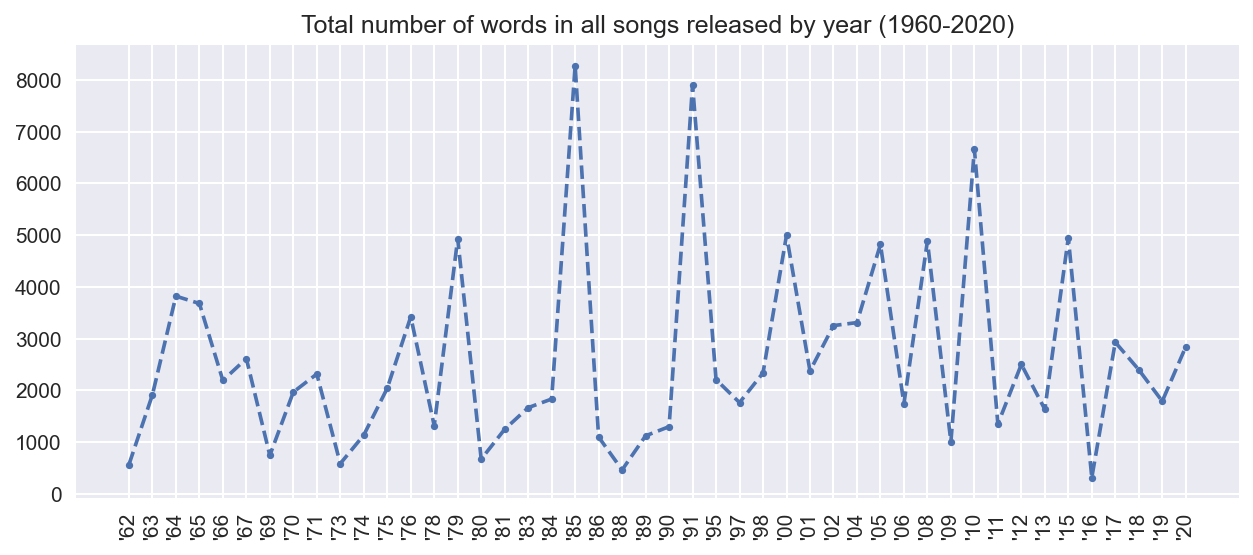

In [270]:
def lby_year(by_year):
    tok = [nltk.word_tokenize(song) for song in by_years['lyrics']]
    wrd_l = [len(toke) for toke in tok]
    years = [year for year in by_year['year']]
    clubbed = pd.Series(wrd_l,years)
    return clubbed
word_length = lby_year(by_years)

def plt_wrd(word_length):
    plt.title("Total number of words in all songs released by year (1960-2020)")
    plt.plot(word_length,"--.")
plt.rcParams['figure.figsize'] = [10, 4]
plt.xticks(rotation='vertical')
plt_wrd(word_length)

In [135]:
## Corpus Based Analysis : 

In [259]:
read_corpus = pd.read_csv(dylan_corpus)
read_corpus.columns = ['Sr. No',"Dylan's Corpus"]

In [260]:
read_corpus

,Sr. No,Dylan's Corpus
0,0,"'Go ahead, drive the nails through my hand Lau..."


In [261]:
corpus = [corpus for corpus in read_corpus["Dylan's Corpus"]]
corpus[0][:1000]

"'Go ahead, drive the nails through my hand Laugh at me where you stand Go ahead, say it isnt me But the day will come That you will see  Cause Ill rise again Aint no power on Earth can tie me down Yes, Ill rise again Death cant keep me buried in the ground  Go ahead and mock my name You will see, Im still the same Go ahead, try to bury me Very, very soon I will be free  Cause Ill rise again Aint no power on Earth can tie me now And Ill rise again Death cant keep me buried in the ground  Go ahead, say Im dead and gone You will see that you were wrong Go ahead, try to hide the Son But the day will come When youll see Im the one  Cause Ill rise again Aint no power on Earth can tie me down Yes, Ill rise again Death cant keep me buried in the ground''Unlike most of the songs nowadays that have been written up in Tin Pan Alley, thats where most of the folk songs come from nowadays, this, this is a song, this wasnt written up there, this was written somewhere down in the United States  Well,

In [262]:
cleaned_corpus = lyrics_to_words(corpus[0])

In [263]:
corpus_tokenized = nltk.word_tokenize(cleaned_corpus)
corpus_tokenized[:10]

["'go",
 'ahead',
 'drive',
 'nail',
 'hand',
 'laugh',
 'stand',
 'go',
 'ahead',
 'say']

In [21]:
tokens = len(corpus_tokenized)
types = len(set(corpus_tokenized))
print(f"For artist Bob Dylan\n1) Total number of tokens are {tokens}\n2) Total number of types are {types}")

For artist Bob Dylan
1) Total number of tokens are 91085
2) Total number of types are 7966


### 2) Lexical Deversity and Occurances 
#### Lexical Deversity is defined as ::

In [22]:
def lex_div(corpus):
    lex_div = types / len(corpus)
    print(f"Bob Dylan's Lexical Deversity is: {lex_div} or {lex_div*100} %")
lex_div(corpus_tokenized)

Bob Dylan's Lexical Deversity is: 0.08745677114782895 or 8.745677114782895 %


### Or can also be visualized as : 
### Occurances ::  See how many times words like love/hate/she/he appers
#### Hypothesis : There is only one song in which Bob Dylan mentions the name "Sara", hence should occur at only one particular section

In [23]:
corpus_text = nltk.Text(corpus_tokenized)
def occurs(words):
    for word in words:
        count = corpus_text.count(word)
        as_per = 100 * count / len(corpus_text)
        print(f"{as_per} % of the corpus is taken by word '{word}'")
        
occurs(["clown","sara","she"])

0.01427238293901301 % of the corpus is taken by word 'clown'
0.026349014656639403 % of the corpus is taken by word 'sara'
0.008783004885546468 % of the corpus is taken by word 'she'


In [1]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['figure.figsize'] = [8, 5]
corpus_text.dispersion_plot(['she','he','love','hate','death','clown','sara','leave','you'])

NameError: name 'plt' is not defined

### Fast Facts :

In [25]:
largest_word = sorted(set(corpus_tokenized), key=len,reverse=True)[0]
print(f"Largest word in Bob Dylan's Corpus is : '{largest_word}' with length {len(largest_word)}.")

Largest word in Bob Dylan's Corpus is : 'great-granddaughter' with length 19.


"A-" before a verb was a prefix quite common in 16th C. English. It is still, today, quite common in Appalachian English, in the US, which is where Dylan no doubt took his influence.

#### the famous a-words lmao

In [26]:
aape = sorted({word for word in corpus_tokenized if word.startswith("a-")})

In [27]:
print(f"Total : {len(aape)} \nFew examples : {aape[1:7]}")

Total : 130 
Few examples : ['a-barkin', 'a-barking', 'a-beatin', 'a-bendin', 'a-blazing', 'a-bleedin']


### Average word length

In [28]:
length = list(map(len, corpus_tokenized))
sum(length) / len(length)

4.896624032497118

### Frquency of words: Without stopwords 

In [29]:
freq_dist = nltk.FreqDist(word.lower() for word in corpus_tokenized if word.isalpha())

In [30]:
freq_dist.most_common(25)

[('im', 1048),
 ('like', 844),
 ('well', 821),
 ('dont', 774),
 ('know', 756),
 ('got', 736),
 ('one', 672),
 ('say', 594),
 ('time', 555),
 ('see', 539),
 ('youre', 510),
 ('come', 500),
 ('said', 477),
 ('go', 469),
 ('man', 468),
 ('love', 432),
 ('cant', 405),
 ('get', 404),
 ('aint', 379),
 ('never', 376),
 ('oh', 363),
 ('there', 357),
 ('you', 356),
 ('could', 350),
 ('ill', 349)]

### Hapaxes

In [31]:
hapaxes = freq_dist.hapaxes()

In [32]:
print(f"Total number of Hapaxes : {len(hapaxes)} or {100 * len(hapaxes)/types} % of the total corpus")

Total number of Hapaxes : 2368 or 29.726336931960834 % of the total corpus


In [33]:
hapaxes[:25]

['very',
 'ranger',
 'tonto',
 'fixing',
 'taketh',
 'teacheth',
 'builder',
 'shapeth',
 'turneth',
 'dwells',
 'solemnly',
 'bombed',
 'bled',
 'lynching',
 'gladiator',
 'cheered',
 'tread',
 'dread',
 'shedding',
 'layer',
 'persecutor',
 'manipulator',
 'sodom',
 'gomorrah',
 'leviticus']

## Zipfs

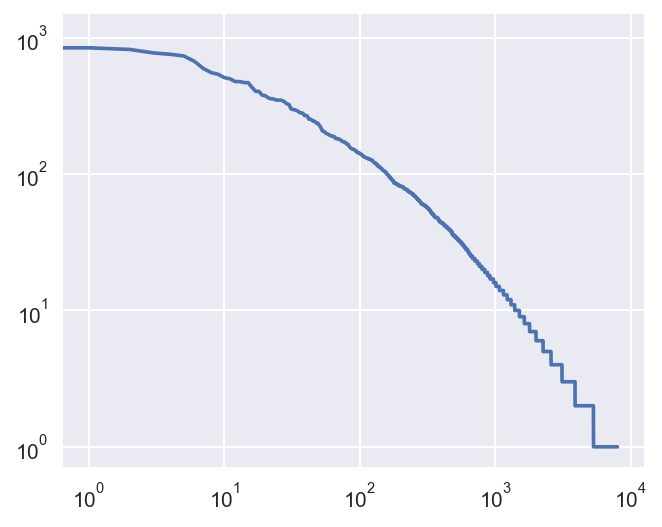

In [264]:
plt.rcParams['figure.figsize'] = [5, 4]
words = [w for w in corpus_tokenized]
fdist = nltk.FreqDist(words)
e = [no for no in fdist.values()]
counts = sorted(e,reverse=True)
plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.plot(counts)

### According to the figure above, we can confirm Zipf's law. At the extreme right end of the plotted line, there are apparent steps, which means that a lot of words have quite low occurences. At the extreme left end, the line is quite flat, which means the frequencies of the first few most frequent words are close that they do not drop as quickly as the ones ranking in the middle.

### Question beggin through years

In [266]:
quest_dict = {}
def question(df):
    year = 0
    for song in df.lyrics.values:
        year += 1
        qm = song.count("?")
        quest_dict[year] = qm
    return quest_dict
question = question(by_years_raw)
question_by_years = dict(zip(years[:-1], list(question.values()))) 

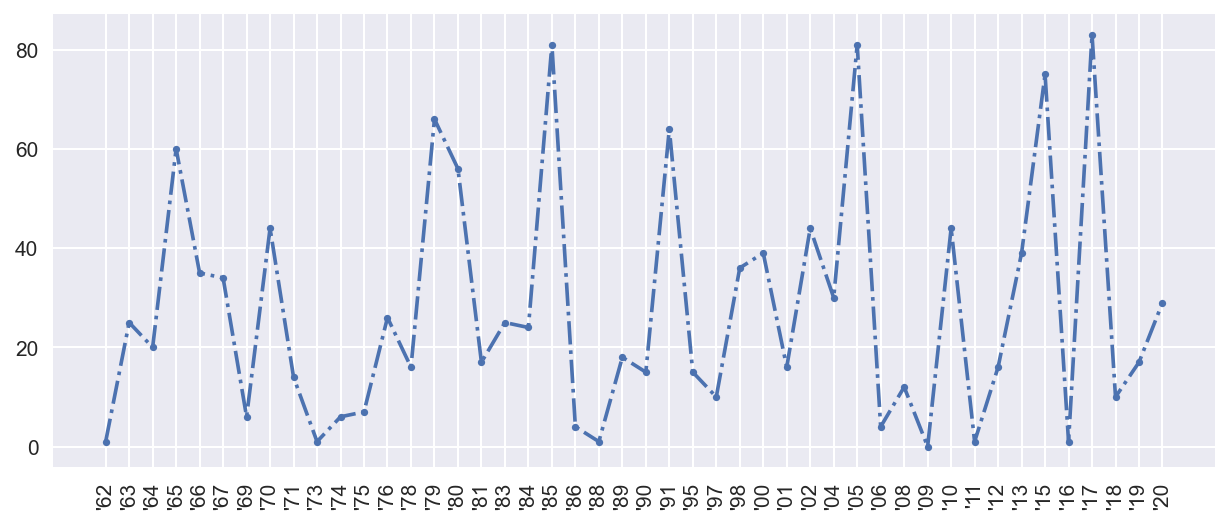

In [267]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.xticks(rotation='vertical')
plt.plot(list(question_by_years.keys()),list(question_by_years.values()),".-.")

### Collocations (Bigrams/Trigrams) in Dylan's Corpus
#### Makes sense, sheer amount of repitation in songs. As expected most of the bigrams are just song names or hooks in the songs (Idiot wind ( song title ) / jingle jangle (Mr. Tambourine Man)) etc

In [37]:
corpus_text.collocations()

key west; true love; dont know; theyll stone; neighborhood bully;
knockin heaven; mobile memphis; shelter storm; new york; forever
young; julius ethel; shine light; knock knockin; inside mobile;
desolation row; idiot wind; heaven door; far away; hard hard; tangled
blue


### Most common n-grams 
#### 1) bigrams 2) trigrams 3) 4-gram 4) 5-gram 


In [38]:
bigrams = nltk.FreqDist(ngrams(corpus_tokenized,2)).most_common(5)
trigrams = nltk.FreqDist(ngrams(corpus_tokenized,3)).most_common(5)
grams_4 = nltk.FreqDist(ngrams(corpus_tokenized,4)).most_common(5)
grams_5 = nltk.FreqDist(ngrams(corpus_tokenized,5)).most_common(5)

In [39]:
bigrams

[(('gon', 'na'), 293),
 (('dont', 'know'), 118),
 (('im', 'going'), 95),
 (('true', 'love'), 68),
 (('dont', 'want'), 65)]

In [40]:
trigrams

[(('youre', 'gon', 'na'), 57),
 (('im', 'gon', 'na'), 46),
 (('aint', 'gon', 'na'), 38),
 (('knockin', 'heaven', 'door'), 33),
 (('idiot', 'wind', 'blowing'), 32)]

In [41]:
grams_4

[(('come', 'in', 'said', 'ill'), 30),
 (('in', 'said', 'ill', 'give'), 30),
 (('mr', 'tambourine', 'man', 'play'), 30),
 (('tambourine', 'man', 'play', 'song'), 30),
 (('hey', 'mr', 'tambourine', 'man'), 29)]

In [42]:
grams_5

[(('come', 'in', 'said', 'ill', 'give'), 30),
 (('mr', 'tambourine', 'man', 'play', 'song'), 30),
 (('hey', 'mr', 'tambourine', 'man', 'play'), 29),
 (('door', 'knock', 'knock', 'knockin', 'heaven'), 27),
 (('knock', 'knock', 'knockin', 'heaven', 'door'), 27)]

In [43]:
# cfd = nltk.ConditionalFreqDist((year,word) 
#                                for year in years
#                                for word in as_dict[year].split())

### for ARI through years , use sentence segmentation 
Punkt sentence segmenter

## Segmentation

### The Automated Readability Index (ARI) of the text is defined to be: 4.71 μw + 0.5 μs - 21.43
#### Let us define μw to be the average number of letters per word, and μs to be the average number of words per sentence, in a given text. 

In [44]:
ari_dict = {}
def ari(df):
    year = 0
    for song in df.lyrics.values:
        year += 1
        punkted = nltk.sent_tokenize(song)
        uw = list(map(len, punkted))
        avg_uw = sum(uw) / len(uw)
        us = [len(sent.split()) for sent in punkted]
        avg_us = sum(us) / len(us)
        ari = 4.71 * avg_uw + 0.5 * avg_us - 21.43    
        ari_dict[year] = round(ari/1000)
    return ari_dict
ari = ari(by_years)
ari_by_years = dict(zip(years[:-1], list(ari.values()))) 

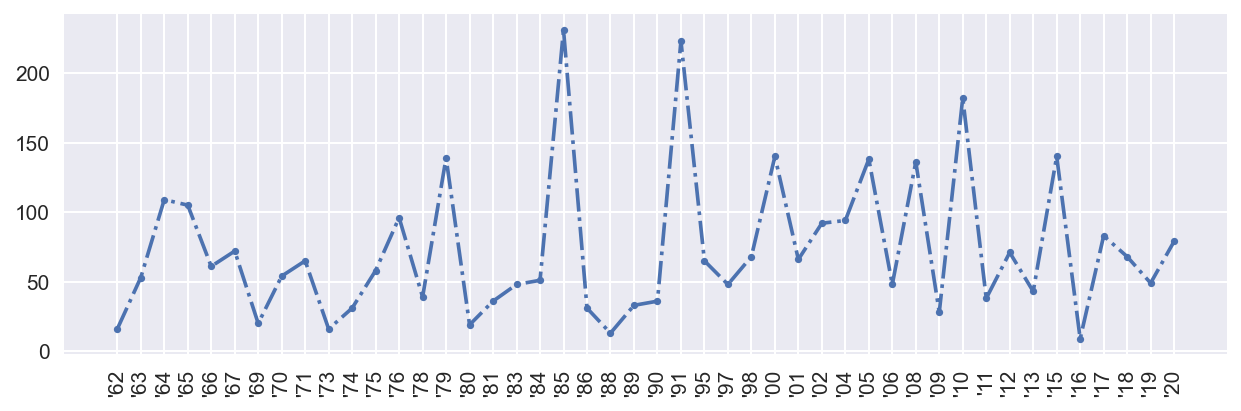

In [45]:
plt.rcParams['figure.figsize'] = [10, 3]
plt.xticks(rotation='vertical')
plt.plot(list(ari_by_years.keys()),list(ari_by_years.values()),".-.")

## Wordcloud

In [46]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [193]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import cv2

In [180]:
mask = cv2.imread(r"C:/Users/jayes/Desktop/hopeworks.png",1)

In [202]:
color_mask = cv2.imread(r"C:/Users/jayes/Desktop/hgffgfdsdf.png")

In [203]:
image_colors = ImageColorGenerator(color_mask)

In [142]:
stopwords = STOPWORDS
stopwords.update(['us', 'one', 'will', 'said', 'now', 'well', 'man', 'may',
 'little', 'say', 'must', 'way', 'long', 'yet', 'mean',
 'put', 'seem', 'asked', 'made', 'half', 'much',
 'certainly', 'might', 'came','say','well','dont','got','know','see','Im','aint','youre','theres','Ive'])

In [247]:
wc = WordCloud(max_words=500,
     relative_scaling=0.5,
     background_color='white',
     margin=0,
     mask=mask,
     stopwords=stopwords,
     random_state=10,
     contour_width=1,
     colormap='winter',
     contour_color='white').generate(cleaned_corpus)

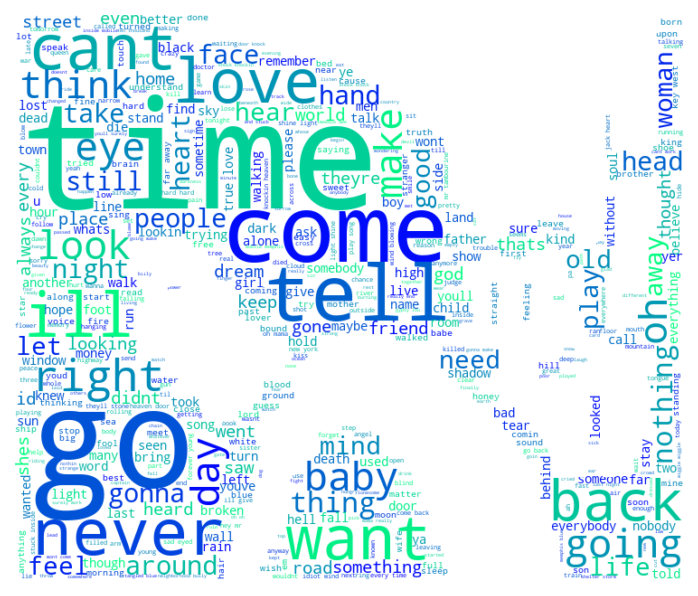

In [274]:
colors = wc.to_array()
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.imshow(colors, interpolation="bilinear")
plt.axis('off')
plt.show()

In [52]:
from itertools import chain
from nltk.corpus import wordnet as wn
import inflect

In [53]:
p = inflect.engine()

# Common Motifs 
### Synsets Perhaps?

clean the corpus of stopwords, puncts - Done
extract all nouns
make a set out of it 
for each word make a synset
show words with max synsets :: DOne!!

#### NN	noun, singular (cat, tree)
#### NNS	noun plural (desks)
#### NNP	proper noun, singular (sarah)
#### NNPS proper noun, plural (indians or americans)

In [54]:
sing_n = {sets[0] for sets in nltk.pos_tag(corpus_tokenized) if sets[1] == 'NN'}
plu_n = {sets[0] for sets in nltk.pos_tag(corpus_tokenized) if sets[1] == 'NNS'}
sing_prop_n = {sets[0] for sets in nltk.pos_tag(corpus_tokenized) if sets[1] == 'NNP'}
plu_prop_n = {sets[0] for sets in nltk.pos_tag(corpus_tokenized) if sets[1] == 'NNPS'}
nouns = set(chain(sing_n,plu_n,sing_prop_n,plu_prop_n))

KeyboardInterrupt: 

In [ ]:
plural_nouns = set()
for word in nouns:
    sing = p.singular_noun(word)
    if sing:
        plural_nouns.add(sing)
    else:
        plural_nouns.add(word)

In [ ]:
all_l = {}
res = defaultdict(set)
for noun in plural_nouns:
    t = wn.synsets(noun)
    if t is not None:
        lemma = set()
        for synset in t:
            l = {l for l in synset.lemma_names()}
            lemma.update(l) 
        all_l[noun] = lemma
for key,val in all_l.items():
    count = 0
    for ent in val:
        if ent in plural_nouns:
            count += 1
    res[count].add(key)

In [ ]:
res

#### Locate all the geographical places mentioned in the song

In [ ]:
import spacy

In [ ]:
def entityreco(text):    
    person = []
    norp = []
    fac = []
    gpe = []
    loc = []
    event = []
    works = []
    lang = []
    
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    for entity in doc.ents:        
        if entity.label_ == "PERSON":
            person.append(entity)
        if entity.label_ == "NORP":
            norp.append(entity)
        if entity.label_ == "FAC":
            fac.append(entity)  
        if entity.label_ == "GPE":
            gpe.append(entity)
        if entity.label_ == "LOC":
            loc.append(entity)
        if entity.label_ == "EVENT":
            event.append(entity)
        if entity.label_ == "WORK_OF_ART":
            works.append(entity)
        if entity.label_ == "LANGUAGE":
            lang.append(entity)  

    return person,norp,fac,gpe,loc,event,works,lang

In [ ]:
# entityreco(cleaned_corpus)

### Can go deep--- use hyponyms : Suppose if our motif is weather he uses "artist" a lot then search for its hyponums, that is what kind of artist does he mention the most

## Could've said joker and clown but sysnset doesn;t habe joker in it, so lemme add here!

In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [56]:
sid = SentimentIntensityAnalyzer()

In [57]:
negative = []
neutral = []
positive = []
compound = []

In [58]:
by_years.head()

,year,lyrics
0,'62,'im thousand mile home walking road men gone i...
1,'63,'how many road must man walk call man many sea...
2,'64,'hollis brown lived outside town hollis brown ...
3,'65,'once upon time dressed fine threw bum dime pr...
4,'66,'early mornin early mornin im callin im callin...


In [59]:
for_sa = by_years[["year","lyrics"]]

In [60]:
sentiment_by_years = for_sa.copy()

In [61]:
sentiment_by_years.head()

,year,lyrics
0,'62,'im thousand mile home walking road men gone i...
1,'63,'how many road must man walk call man many sea...
2,'64,'hollis brown lived outside town hollis brown ...
3,'65,'once upon time dressed fine threw bum dime pr...
4,'66,'early mornin early mornin im callin im callin...


In [62]:
for i in sentiment_by_years['lyrics']:
    scores = sid.polarity_scores(i)
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])

In [63]:
sentiment_by_years['negative'] = negative
sentiment_by_years['neutral'] = neutral
sentiment_by_years['positive'] = positive
sentiment_by_years['compound'] = compound
sentiment_by_years['Negative inclined'] = np.where(sentiment_by_years['negative'] > sentiment_by_years['positive'], 'True', 'False')
negatives = sentiment_by_years.loc[sentiment_by_years['Negative inclined'] == 'True']
negative_years = [y for y in negatives['year']]

In [64]:
sentiment_by_years.head()

,year,lyrics,negative,neutral,positive,compound,Negative inclined
0,'62,'im thousand mile home walking road men gone i...,0.102,0.706,0.193,0.9942,False
1,'63,'how many road must man walk call man many sea...,0.164,0.643,0.193,0.9961,False
2,'64,'hollis brown lived outside town hollis brown ...,0.180,0.654,0.166,-0.9981,True
3,'65,'once upon time dressed fine threw bum dime pr...,0.143,0.686,0.171,0.9987,False
4,'66,'early mornin early mornin im callin im callin...,0.142,0.603,0.255,0.9998,False


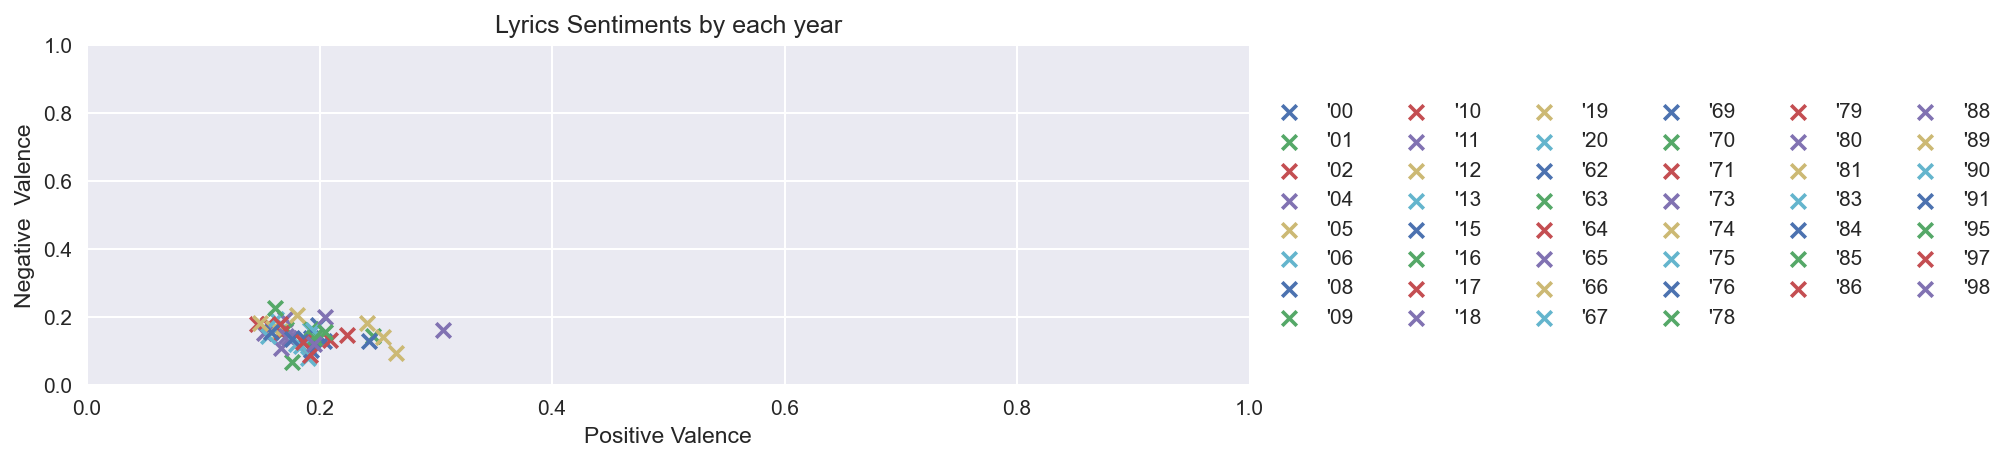

In [65]:
def sctplt():
    for name, group in sentiment_by_years.groupby('year'):
        plt.scatter(group['positive'],group['negative'],label=name, marker='x')
sctplt()
plt.xlim([0.00,1])
plt.ylim([0.00,1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=6)
plt.title("Lyrics Sentiments by each year")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

## Well this tell me nothing but just says his songs are negative or "sad" yeah well everyone knows 

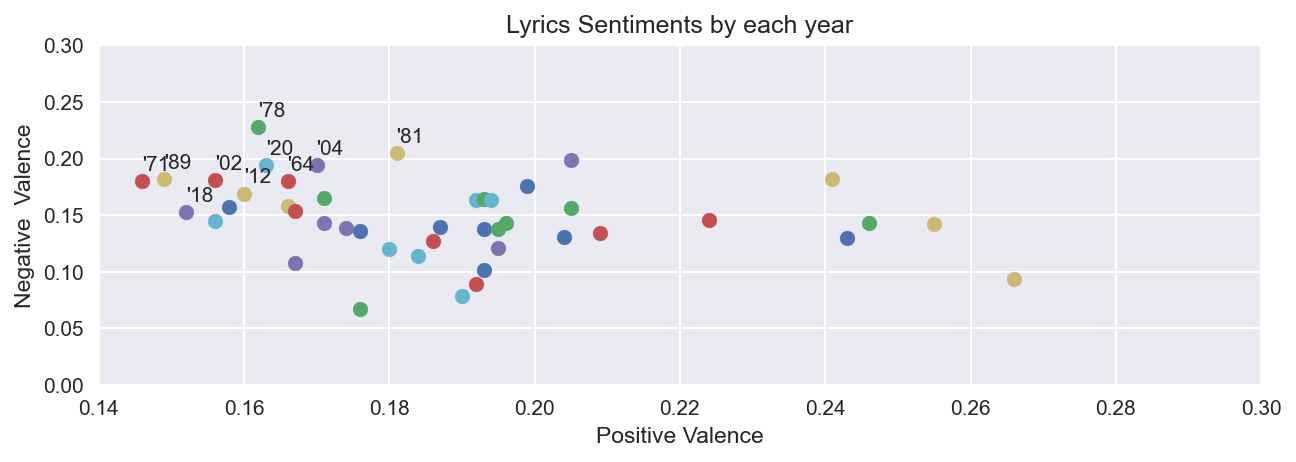

In [66]:
def sctplt():
    for name, group in sentiment_by_years.groupby('year'):
        plt.scatter(group['positive'],group['negative'],label=name, marker='o')
        for y in negative_years:
            if y == name:
                label = f"{name}"
                plt.annotate(label, # this is the text
                (group['positive'],group['negative']), # this is the point to label
                textcoords="offset points", # how to position the text
                xytext=(0,5), # distance from text to points (x,y)
                ha='left') # horizontal alignment can be left, right or center

sctplt()
plt.xlim([0.14,0.30])
plt.ylim([0.00,0.30])
plt.title("Lyrics Sentiments by each year")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

## TF - ID

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
vectors = vectorizer.fit_transform([cleaned_corpus])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist,columns=[feature_names])
df = df.transpose()
df.columns = ['TF-IDF']
df = df.sort_values(by=['TF-IDF'],ascending=False)

In [ ]:
df[:10]